In [306]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc
import csv
import math

Agreement 1) This assignment represents my own work. I did not work on this assignment with others. All coding was done by myself.

Agreement 2) I understand that if I struggle with this assignment that I will reevaluate whether this is the correct class for me to take. I understand that the homework only gets harder.

### Exercise 1

#### Part 1

Given $h(x) = f(x) + g(x) $:
$$ h(ax + (1-a)x) = f(ax + (1-a)x) + g(ax + (1-a)x) $$

Give $f(x)$ and $g(x)$ are convex functions, so by definition: 
$$ f(ax + (1-a)x) \leq af(x) + (1-a) f(x) $$
$$ g(ax + (1-a)x) \leq ag(x) + (1-a) g(x) $$

We then know that: 
$$ f(ax + (1-a)x) + g(ax + (1-a)x) \leq af(x) + (1-a) f(x) + ag(x) + (1-a) g(x) $$ 

Therefore $h(x)$ satisfies the definition of a convex function: 
$$ h(ax + (1-a)x) \leq ah(x) + (1-a) h(x) $$

#### Part 2

By Hint 2:
$$ log(\prod_{i=1}^k g_i(x)) = \sum_{i=1}^k log(g_i(x)) $$

Since we are given $g_i(x) \geq 0$, we know that $g_i(x)$ is in $\mathbb{R^+}$ and so $log(g_i(x))$ is concave and monotonically increasing

By Hint 1, the sum of k concave functions is concave. Since we established that $log(g_i(x))$  is concave, then $ \sum_{i=1}^k log(g_i(x))$ is also concave

#### Part 3

In [278]:
a = np.array([-2, -1, -0.5, 2])
b = np.array([10, 8, 6, 0])
xvals = np.arange(0, 10)

In [287]:
yvals = [xvals * a[i] + b[i] for i in range(len(a))]

In [342]:
maxvals = []
minvals = []
for i in range(len(yvals[0])):
    vals = [item[i] for item in yvals]
    maxvals.append(max(vals))
    minvals.append(min(vals))
    

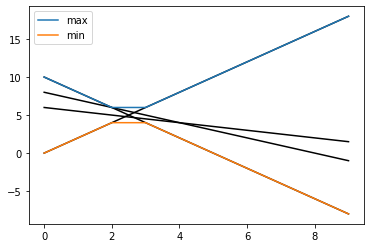

In [348]:
for i in range(len(yvals)):
    plt.plot(xvals, yvals[i], 'k' )
plt.plot(xvals, maxvals, label='max')
plt.plot(xvals, minvals, label='min')
plt.legend()

The maximum across these lines appear to be an approximately convex function, while the minimum across those lines is approximately concave. 

#### Part 4

$$h(x) = max(f(x), g(x)) $$

Since we know that both $f(x)$ and $g(x)$ are convex, by definition: 
$$ f(ax + (1-a)x) \leq af(x) + (1-a) f(x) $$
$$ g(ax + (1-a)x) \leq ag(x) + (1-a) g(x) $$

Now looking at $max(f(x)), max(g(x))$, we can see that: 
$$ maxf(ax + (1-a)x) \leq a \cdot maxf(x) + (1-a) \cdot maxf(x) $$
$$ maxg(ax + (1-a)x) \leq a \cdot maxg(x) + (1-a)\cdot maxg(x) $$

This holds true  because $max(f(x)) \geq f(x)$ for any value of $x$ and the same holds for $max(g(x))$. Therefore by definition, $max(f(x))$ and $max(g(x))$ are convex functions and so $h(x) = max(f(x), g(x))$ is convex as well. 

#### Part 5

This does not hold true. Using the counterexample where $f(x) =  |x| $, $g(x) = |x-1| $, and $a = 0.5$:
$$ min (0.5 |x| + 0.5 |x-1|)= 0.5 $$
$$ 0.5 min(|x|) + 0.5 min(|x-1|) = 0.5 (0) + 0.5 (0) = 0 $$

Therefore 
$min (0.5 |x| + 0.5 |x-1|)$ is not $\leq$ to $0.5 min(|x|) + 0.5 min(|x-1|) $ as $0.5 !\leq 0 $
and so $h(x) = min (f(x), g(x))$ is not necessarily convex. 

#### Part 6a

In order to show convexity, I will prove by showing the second derivative is strictly positive. 

First showing that the function is convex with respect to one of the terms of $\omega$: 
$$ \frac{\partial}{\partial \omega_1} log(1 + e^{-y_i(\omega^Tx_i + b)})  = \frac{-y_i x_{i} e^{-y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})}$$

$$ \frac{\partial^2}{\partial \omega_1^2} = \frac{(1 + e^{-y_i(\omega^Tx_i + b)})y_i^2x_i^2 e^{-y_i(\omega^Tx_i + b)} - y_i^2 x_{i}^2 e^{-2y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})^2}$$

$$= \frac{y_i^2x_i^2 e^{-y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})^2}
$$

The terms that are squared are always positive, and the exponential function is always positive and monotonically increasing for all values in $\mathbb{R}$. 

Therefore, we have found that the partial second derivative for $\omega_i$ for all $i$ is strictly positive, and therefore $log(1 + e^{-y_i(\omega^Tx_i + b)})$ is a convex function. Since the sum of convex functions is convex with respect to $\omega$, $\sum_i^nlog(1 + e^{-y_i(\omega^Tx_i + b)})$ is also convex. 

Next, showing that the function is convex with respect to $b$:
$$ \frac{\partial}{\partial b} log(1 + e^{-y_i(\omega^Tx_i + b)}) = \frac{-y_ie^{-y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})} $$

$$ \frac{\partial^2}{\partial b^2} = \frac{(1 + e^{-y_i(\omega^Tx_i + b)}) y_i^2 e^{-y_i(\omega^Tx_i + b)} - y_i^2e^{-2y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})^2}
$$

$$ = \frac{y_i^2e^{-y_i(\omega^Tx_i + b)}}{(1 + e^{-y_i(\omega^Tx_i + b)})^2}$$

Similarly as for $\omega$, the squared terms are always positive, and the exponential function is always positive for all values in $\mathbb{R}$. Therefore, the second derivative with respect to b is positive, and so $log(1 + e^{-y_i(\omega^Tx_i + b)})$ is convex with respect to b. Since sum of convex functions is convex, $\sum_i^nlog(1 + e^{-y_i(\omega^Tx_i + b)})$ is also convex with respect to b. 

#### Part 6b

For $L(\omega, b,C) = 0.5 ||\omega||^2_2 + C\sum_{i-1}^m max(0, 1-y_i(\omega^Tx_i + b)), C\geq 0$: 

First looking at the first term $0.5 \cdot ||\omega||^2_2 $
Taking the second derivative for $\omega_1$: 
$$\frac{\partial d}{\partial \omega_1} 0.5 \sqrt{\omega_1^2 + \ldots + \omega_p^2} = \frac{\omega_1}{2\sqrt{\omega_1^2 + \ldots + \omega_p^2 }}$$

$$\frac{\partial^2 d}{\partial \omega_1^2} = \frac{2 \sqrt{\omega_1^2 + \ldots + \omega_p^2} - \frac{2\omega_1^2}{\sqrt{\omega_1^2 + \ldots + \omega_p^2}}}{4(\omega_1^2 + \ldots + \omega_p^2)} $$

$$ = \frac{1}{2\sqrt{\omega_1^2 + \ldots + \omega_p^2}} - \frac{\omega_1^2}{2(\omega_1^2 + \ldots + \omega_p^2)^\frac{3}{2}} $$

$$ = \frac{1}{2\sqrt{\omega_1^2 + \ldots + \omega_p^2}} (1 - \frac{\omega_1^2}{(\omega_1^2 + \ldots + \omega_p^2)}) $$

We can see that $\frac{1}{2\sqrt{\omega_1^2 + \ldots + \omega_p^2}}$ is always positive since each of the omega terms are squares. 

Additionally since $\frac{\omega_1^2}{(\omega_1^2 + \ldots + \omega_p^2)}$ is a proportion, $1 - \frac{\omega_1^2}{(\omega_1^2 + \ldots + \omega_p^2)}$ is always positive. This will be the same for each of the p $\omega$ terms. Since the second derivative is always positive, $0.5 \cdot ||\omega||^2_2 $ is convex. 

Now looking at the second term, $C\sum_{i-1}^m max(0, 1-y_i(\omega^Tx_i + b))$, using the same logic from previous parts:

We can see that $max(0)$ is a convex function by definition since both sides of the equation equals 0.  
$$ max(a0 + (1-a)0) = a\cdot max0 + (1-a) \cdot max0 $$

Doing the same for the second term, if we let $z = 1-y_i(\omega^Tx_i + b)$ where $z \in \mathbb{R}$. Since $z \leq maxz$ for all z, we can see that: 
$$ max(az + (1-a)z) \leq a \cdot maxz + (1-a) \cdot maxz $$

Therefore, $max(0, 1-y_i(\omega^Tx_i + b))$ is a convex function. Since the sum of convex functions is also convex, and since C is a non-negative constant, we have proven that the second term $C\sum_{i-1}^m max(0, 1-y_i(\omega^Tx_i + b))$ is convex. 

We have shown that each term of $L(\omega, b,C)$ is a convex of function, so again using that the sum of convex functions is also convex, we have shown that $L(\omega, b,C) = 0.5 ||\omega||^2_2 + C\sum_{i-1}^m max(0, 1-y_i(\omega^Tx_i + b)), C\geq 0$ is convex

#### Part 7

Using a similar strategy as the previous part, I will break the function into its two terms. 

First looking at $C ||\omega||_1$ with $ C \geq 0$: 

We can show that the absolute value function is convex for $\omega$: 

First, since absolute value function is multiplicative: 
$$C|a\omega + (1-a)\omega| = C|a||\omega| + C|1-a||\omega| $$

For the function to be convex, this condition must hold:
$$ C|a||\omega| + C|1-a||\omega| \leq Ca |\omega| + C(1-a)|\omega| $$


Since a is positive, 
$$ C|a||\omega| + C|1-a||\omega| =C a |\omega| + C(1-a)|\omega| $$

Therefore, we have shown that $C ||\omega||_1$ is a convex function. 

Now looking at the other term, $ ||y - (X\omega + b1_n)) ||^2_2$

When taking the derivative of the above function with respect to $\omega$, $y$ and $b$ are treated as constants, so the equation reduces to:
$$\frac{\partial}{\partial \omega} ||y - (X\omega + b1_n)) ||^2_2 =  \frac{\partial}{\partial \omega} ||(X\omega)) ||^2_2$$

Finding the second derivative of one of the terms of $\omega$ to assess if it satisifies condition for convexity:
$$ \frac{\partial}{\partial \omega_1} ||(X\omega)) ||^2_2 = \frac{X^2\omega_1}{\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 }} $$

$$ \frac{\partial^2}{\partial \omega_1^2} = \frac{X^2\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 } - \frac{X^4\omega_1^2}{\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 }}}{((X\omega_1)^2 + \ldots + (X\omega_p)^2) } $$

$$ = \frac{X^2}{\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 }} -\frac{X^4\omega_1^2}{((X\omega_1)^2 + \ldots + (X\omega_p)^2)^{\frac{3}{2}} } $$

$$ = \frac{X^2}{\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 }} (1 - \frac{(X\omega_1)^2}{((X\omega_1)^2 + \ldots + (X\omega_p)^2 )})$$

For the second derivative, the term $\frac{X^2}{\sqrt{(X\omega_1)^2 + \ldots + (X\omega_p)^2 }}$ is positive since all the terms are squared. Also, since $\frac{(X\omega_1)^2}{((X\omega_1)^2 + \ldots + (X\omega_p)^2 )}$ is a proportion, the second term also remains positive. Therefore, the second partial derivative for $\omega_i$ for all $i$ is positive, so $||y - (X\omega + b1_n)) ||^2_2$ is a convex function.

Since the sum of convex function is convex, and since we found that the two terms separately are convex functions, we can conclude that $L(\omega, b,C) = ||y - (X\omega + b1_n)) ||^2_2 + C ||\omega||_1 $ is convex. 

### Exercise 2

#### Part 1a

$$ \nabla f(x) = 
\begin{bmatrix}
\frac{\partial f(x)}{\partial x_1} \\
\frac{\partial f(x)}{\partial x_2} \end{bmatrix} $$
$$ \nabla f(x) = \begin{bmatrix}
4x_1 - 4 + 2x_2 \\
6x_2 - 6 + 2x_1 \end{bmatrix}$$

#### Part 1b

$$ H f(x) = 
\begin{bmatrix}
\frac{\partial^2 f(x)}{\partial x_1^2} & \frac{\partial^2 f(x)}{\partial x_1 \partial x_2}\\
\frac{\partial f(x)}{\partial x_2 \partial x_1} &  \frac{\partial^2 f(x)}{\partial x_2^2}\end{bmatrix} $$
$$ Hf(x) = 
\begin{bmatrix} 
4 & 2 \\ 2 & 6
\end{bmatrix}
$$

#### Part 1c

Finding critical points, ie finding $x$ where $ \nabla f(x) = 0 $:

We have the system of equations: 
$$ 4x_1 + 2x_2 - 4= 0 $$
$$ 2x_1 + 6x_2 - 4 = 0 $$

Solving the first equation for $x_1$: 
$$ x_1 = 1 - 0.5x_2$$

Plugging into the second equation: 
$$ 2(1 - 0.5x_2) + 6x_2 - 4 = 0 $$
$$ x_2 = \frac{4}{5} $$

Solving for $x_1$: 
$$ x_1 = 1 - \frac{1}{2} * \frac{4}{5} $$
$$ x_1 = \frac{3}{5} $$

$H f([\frac{3}{5}, \frac{4}{5}]^T) = \begin{bmatrix} 
4 & 2 \\ 2 & 6
\end{bmatrix}$ is positive definite so we know that the critical point found is the minimum of $f(x)$

Therefore: 
$$ x^* = \begin{bmatrix}
\frac{3}{5} \\
\frac{4}{5} \end{bmatrix} $$

#### Part 2

$$ x_1 = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
- \alpha \begin{bmatrix} 
4x_1 - 4 + 2x_2 \\ 6x_2 - 6 + 2x_1
\end{bmatrix} $$
Using $\alpha = 0.1$: 
$$ x_1 = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 0.1 \begin{bmatrix} 
4 & 2 \\ 2 & 6
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 0.1 \begin{bmatrix} 4 \\ 6 \end{bmatrix} $$


$$ x_1 = 
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -  
\begin{bmatrix} 0.4 & 0.2 \\ 0.2 & 0.6 \end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 
\begin{bmatrix} 0.4 \\ 0.6 \end{bmatrix} $$

$$ x_1 = \begin{bmatrix} 0.6 & -0.2 \\ -0.2 & 0.4 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 
\begin{bmatrix} 0.4 \\ 0.6 \end{bmatrix}
$$

Let $ A = \begin{bmatrix} 0.6 & -0.2 \\ -0.2 & 0.4 \end{bmatrix}$ and $B = \begin{bmatrix} 0.4 \\ 0.6 \end{bmatrix} $:
$$ x_1 = A \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + B $$

Now finding for $x_3$: 
$$ x_3 = A(A(A \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + B) + B) + B $$
$$ = A^3 \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + A^2 B + AB + B$$ 
$$ = A^3 \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + (I + A + A^2)B$$ 

Generalizing for $z$ for some $t+1$: 
$$ x_z = A^z \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + (I + A + A^2 + \ldots + A^{z-1})B $$

First, we can find the eigenvalues of A to show that $A^z$ converges to the zero matrix (Hint 2):
$$ det\begin{bmatrix} 0.6 - \lambda & -0.2 \\ -0.2 & 0.4 - \lambda \end{bmatrix} = 0 $$
$$ (0.6 - \lambda)(0.4 - \lambda) - 0.04 = 0 $$
$$ \lambda^2 - \lambda + 0.2 = 0 $$
$$ \lambda \approx 0.276, 0.724$$

Since both eigenvalues of A have absolute value less than 1, we can conclude that $A^z$ converges to 0 using Hint 2. 

The second term contains a geometric series, so using hint 1:
$$ I + A + A^2 + \ldots + A^{z-1} = (I-A)^{-1} (I-A^z) $$

Since we found that $A^z \to 0$ above:
$$ (I-A)^{-1} (I-0) $$
$$ = (\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - \begin{bmatrix} 0.6 & -0.2 \\ -0.2 & 0.4 \end{bmatrix}) ^ {-1} $$
$$ = (\begin{bmatrix} 0.4 & 0.2 \\ 0.2 & 0.6 \end{bmatrix})^{-1} $$

$$ = \frac{1}{0.4 \cdot 0.6 - 0.2 \cdot 0.2} \begin{bmatrix} 0.6 & -0.2 \\ -0.2 & 0.4 \end{bmatrix} $$

$$ I + A + A^2 + A^{z-1} = \begin{bmatrix} 3 & -1 \\ -1 & 2 \end{bmatrix} $$

Therefore the expression for $x_z$ reduces to: 
$$ x_z = A^z \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + (I + A + A^2 + \ldots + A^{z-1})B $$ 
$$ x_z = 0 + 
\begin{bmatrix} 3 & -1 \\ -1 & 2 \end{bmatrix}
\begin{bmatrix} 0.4 \\ 0.6 \end{bmatrix} $$

$$ x_z = 
\begin{bmatrix}
1.2 - 0.6 \\
-0.4 + 1.2 
\end{bmatrix} $$

$$ x_z = \begin{bmatrix}0.6 \\ 0.8 \end{bmatrix} = \begin{bmatrix} \frac{3}{5} \\ \frac{4}{5} \end{bmatrix} = x^*$$

#### Part 3

No when $\alpha$ is sufficiently large, the eigenvalues of A will no longer satisfy the condition for $A^{z-1}$ to converge to 0. Thus, $x_z$ will not converge to a stationary point as the first term will be a function of the previous point. 

$$ x_1 = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 0.1 \begin{bmatrix} 
4 & 2 \\ 2 & 6
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 0.1 \begin{bmatrix} 4 \\ 6 \end{bmatrix} $$

To show by example, when $\alpha = 0.5$ for the function we have been using:
$$ x_1 = 
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -  
\begin{bmatrix} 2 & 1 \\ 1 & 3 \end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 
\begin{bmatrix} 0.4 \\ 0.6 \end{bmatrix} $$

$$ \Rightarrow A = \begin{bmatrix} -1 & -1 \\ -1 & -2 \end{bmatrix}$$

$$ det\begin{bmatrix} -1 - \lambda & -1 \\ -1 & -2 - \lambda \end{bmatrix} = 0 $$

$$ \lambda^2 + 3\lambda + 1 = 0 $$
$$ \lambda \approx -2.618, -0.382 $$
Since the absolute values of the eigenvalues are not less than 1, $A^{z-1}$ will not converge and so $x_{t+1}$ will not converge to $x^*$. 

#### Part 4a

Finding $ x_{t+1} = x_t - Hf(x_{t})^{-1} \nabla f(x)$ using $x_t = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$:
$$ H^{-1} = \frac{1}{20} 
\begin{bmatrix} 
6 & -2 \\ -2 & 4
\end{bmatrix}  = \begin{bmatrix} 
\frac{3}{10} & -\frac{1}{10} \\ -\frac{1}{10} & \frac{1}{5}
\end{bmatrix}$$

$$ \nabla f(x_t) =  \begin{bmatrix} 
4(1) - 4 + 2(2) \\ 6(2) - 6 + 2(1)
\end{bmatrix} = 
\begin{bmatrix} 4 \\ 8 \end{bmatrix}$$

$$ x_{t+1} = 
\begin{bmatrix} 
1 \\ 2
\end{bmatrix} - 
 \begin{bmatrix} 
\frac{3}{10} & -\frac{1}{10} \\ -\frac{1}{10} & \frac{1}{5}
\end{bmatrix} 
\begin{bmatrix} 4 \\ 8 \end{bmatrix}
 $$
$$ = \begin{bmatrix} 1 \\ 2 \end{bmatrix} -
\begin{bmatrix} \frac{6}{5} - \frac{4}{5} \\ -\frac{2}{5} + \frac{8}{5} \end{bmatrix}
$$


$$ x_{t+1} =  \begin{bmatrix} 
\frac{3}{5} \\\frac{4}{5}
\end{bmatrix} $$

This matches the $x^*$ we calculated in 2.1, so Newton's method does converge in one iteration.

#### Part 4b

$$ x_{t+1} = x_t - \alpha \nabla f(x_t) $$
Using $ \alpha = 0.1$ and $ \nabla f(x_t) $ found in previous part:
$$ x_{t+1} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} - 0.1 \begin{bmatrix} 4 \\ 8 \end{bmatrix} $$
$$ x_{t+1} = \begin{bmatrix} \frac{3}{5} \\ \frac{6}{5} \end{bmatrix} $$

This is not converged so finding $x_{t+2}$:
$$ x_{t+2} = x_{t+1} - \alpha \nabla f(x_{t+1}) $$
$$ = \begin{bmatrix} \frac{3}{5} \\ \frac{6}{5} \end{bmatrix} - 0.1 
\begin{bmatrix} 4 \cdot \frac{3}{5} - 4 + 2 \cdot \frac{6}{5} \\ 6\cdot \frac{6}{5} - 6 + 2\cdot \frac{3}{5} \end{bmatrix} $$
$$ = \begin{bmatrix} \frac{3}{5} \\ \frac{6}{5} \end{bmatrix} - 0.1 
\begin{bmatrix} \frac{4}{5} \\ \frac{12}{5} \end{bmatrix} $$

$$ x_{t+2} = \begin{bmatrix} \frac{13}{25} \\ \frac{23}{25} \end{bmatrix}  $$

This is also not converged at $x^*$

#### Part 4c

Newton's method converges faster. This is because $f(x)$ is convex function that is quadratic. Therefore, the second derivative in the update for Newton's method can calculate the exactuve curve at $x_t$ (slope from gradient and curvature from Hessian). So the first step can reach the optimum. For gradient descent, it takes an even step of $\alpha$ down the tangent line of steepest descent, which doesn't take into account curvature that the second derivative for Newton's method does.

### Exercise 3

#### Part 1

If we had depth $n$, or a level for every observation, we can choose a feature that classifies at least one point at each depth. Then at depth where $d = n$, we can guarantee to classify $n$ points correctly, or we can achieve 100% training accuracy. 

#### Part 2

Using the defintion of correlation:
$$ \rho = \frac{Cov(D_i, D_j)}{\sqrt{Var(D_i)Var(D_j)}} $$

Since $ D_i$ are indentically distributed with $Var(D_i) = \sigma^2$,
$$ \rho = \frac{Cov(D_i, D_j)}{\sqrt{\sigma^2\sigma^2}} $$
$$ Cov(D_i, D_j) = \rho \sigma^2 $$

$ \bar{D} = \frac{1}{T} \sum_{i=1}^T D_i$
$$ Var(\bar{D}) = Var(\frac{1}{T} \sum_{i=1}^T D_i) $$
Since $T$ is a constant,
$$ = \frac{1}{T^2} Var(\sum_{i=1}^T D_i) $$

By definition of variance of sum of random variables,
$$ = \frac{1}{T^2} [\sum_{i=1}^T Var(D_i) + \sum_{i=1}^T \sum_{i=j\neq i}Cov(D_i, D_j) ] $$

The covariance matrix is $TxT$, so there are $T^2$ covariances subtracting out $T$ values of $Cov(D_i, D_i)$:
$$ = \frac{1}{T^2} [ T\sigma^2 + (T^2 - T) \rho \sigma^2 ] $$

$$ = \frac{1}{T^2} [ T \sigma^2 + T^2\rho \sigma^2 - T \rho \sigma^2 ] $$

$$ Var(\bar{D}) = \frac{(1-\rho) \sigma^2}{T} + \rho \sigma^2 $$

#### Part 3

Given the result from 3.1, as T increases:
$$ \lim_{T \to \infty} \frac{(1-\rho)\sigma^2}{T} = 0 $$

Therefore, the variance will decrease as T increases because the first term goes to 0 as T increases. When T is very large, the variance of the average of trees converges towards $\rho \sigma^2 $

#### Part 4

The correlation between one tree and another is controlled by the number of features to consider for each tree in random forests. The more features, the higher the correlation since each tree is split using essentially all of the features of the dataset rather than a subset. 

### Exercise 4

#### Part 1

In [192]:
# draw 50 for neg 
np.random.seed(21)
neg_samps = np.random.multivariate_normal([-5,-5], 
                                          np.diag(np.full(2,5)), size=50)

# draw 50 for pos 
pos_samps = np.random.multivariate_normal([5,5], 
                                          np.diag(np.full(2,5)), size=50)

In [193]:
X = np.concatenate((pos_samps, neg_samps))
y = np.concatenate((np.full(50,1), np.full(50, -1)))

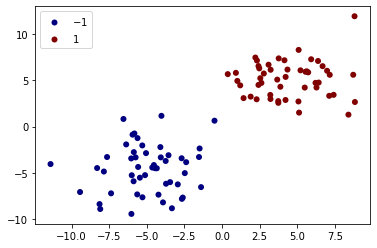

In [194]:
plot = plt.scatter(X[:,0],X[:,1], c=y,cmap="jet", lw=0)
plt.legend(*plot.legend_elements())

#### Part 2

In [220]:
svc = SVC(C=1, kernel='linear')
svc.fit(X,y)

SVC(C=1, kernel='linear')

In [221]:
sup_vec = svc.support_vectors_
coef = svc.coef_[0]
intercept = svc.intercept_
a = -coef[0]/coef[1]
b = intercept[0]/coef[1]

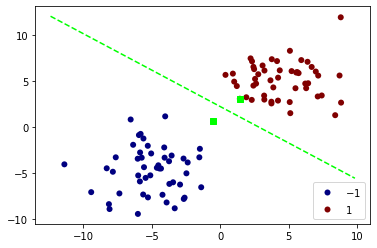

In [225]:
axes = plt.axes()

# original 
plot = plt.scatter(X[:,0],X[:,1], c=y,cmap="jet", lw=0)
plt.legend(*plot.legend_elements())
# support vectors
plt.scatter(sup_vec[:,0],sup_vec[:,1], marker='s', c='#00FF00')
# decision boundary 
x_vals = np.array(axes.get_xlim())
y_vals =  a * x_vals -b
plt.plot(x_vals, y_vals, '--',c='#00FF00')

#### Part 3

In [235]:
cval = [0.01, 0.1, 1, 100, 1000, 10000, 100000, 1000000, 10000000]
bound = []
num_supp = [] 

# for each value of C 
for c in cval:
    svc = SVC(C=c, kernel='linear')
    svc.fit(X,y)
    
    bound.append([svc.coef_[0], svc.intercept_])
    num_supp.append(svc.support_.shape[0])

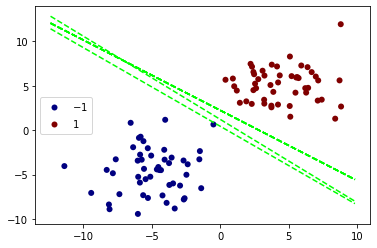

In [236]:
axes = plt.axes()
# original 
plot = plt.scatter(X[:,0],X[:,1], c=y,cmap="jet", lw=0)
plt.legend(*plot.legend_elements())

# plot boundaries 
x_vals = np.array(axes.get_xlim())
for i in bound:
    a = -i[0][0]/i[0][1]
    b = i[1][0]/i[0][1]
    y_vals = a * x_vals -b
    plt.plot(x_vals, y_vals, '--',c='#00FF00')

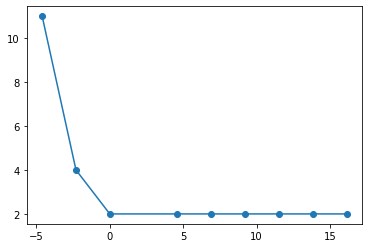

In [239]:
# plot num of support vectors 
plt.scatter(np.log(cval), num_supp)
plt.plot(np.log(cval), num_supp)

The number of support vectors decreases from 10 at the lowest C value of 0.01 and plateaus at 2 support vectors as C increases. When C is small, it becomes a soft-max SVM and prioritizes maximizing the margin over perfect classification. Therefore, the margin is the largest when C is 0.01 among the 9 C values, and so there are more data points from the two data clusters that fall within the margin. When C increases, the tolerance for misclassification decreases and becomes SVM without soft-max. For this sample, when C increases, the maximum margin has two points that are exactly on the margin. 

#### Part 4

In [201]:
norm_scaler = preprocessing.MinMaxScaler()
X_norm = norm_scaler.fit_transform(X)

In [237]:
bound_norm = []
num_supp_norm = [] 

# for each value of C 
for c in cval:
    svc = SVC(C=c, kernel='linear')
    svc.fit(X_norm,y)
    
    bound_norm.append([svc.coef_[0], svc.intercept_])
    num_supp_norm.append(svc.support_.shape[0])

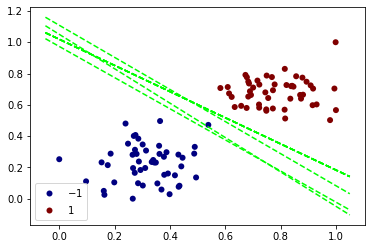

In [238]:
axes = plt.axes()
# original 
plot = plt.scatter(X_norm[:,0],X_norm[:,1], c=y,cmap="jet", lw=0)
plt.legend(*plot.legend_elements())

# plot boundaries 
x_vals = np.array(axes.get_xlim())
y_vals = np.array(axes.get_ylim())
for i in bound_norm:
    a = -i[0][0]/i[0][1]
    b = i[1][0]/i[0][1]
    y_vals = a * x_vals - b
    plt.plot(x_vals, y_vals, '--',c='#00FF00')

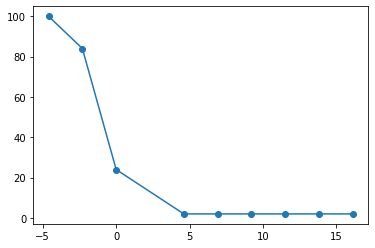

In [204]:
plt.scatter(np.log(cval), num_supp_norm)
plt.plot(np.log(cval), num_supp_norm)

When the values of C are large (above 1 for this sample), the decision boundaries are the same with two support vectors. When C is less than or equal to 1, the decision boundaries are different in that the slope of the boundary line shifts down and becomes more negatively sloped (relative to both the SVM without soft-margin as well as the previous question). Additionally, at the same low C values, the geometric margin is larger for normalized data vs unnormalized as the number of support vectors are larger. This makes sense as the scale of the normalized data is much smaller (0,1) as opposed to (-10, 10). When the data is normalized, since the slope of the decision boundary line becomes more negative (where feature 1 is on the x-axis of the plot), this suggests that feature 1 is more influential to the predictions. 

#### Part 5

In [205]:
# fitting unnorm & norm 
gb = GradientBoostingClassifier(random_state=0).fit(X, y)
gb_norm = GradientBoostingClassifier(random_state=0).fit(X_norm, y)

In [206]:
# create grid based on limits of data 
x0grid = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.1)
x1grid = np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.1)

xx, yy = np.meshgrid(x0grid, x1grid)
# flatten each grid to a vector
r0, r1 = xx.flatten(), yy.flatten()
r0, r1 = r0.reshape((len(r0), 1)), r1.reshape((len(r1), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r0,r1))

In [207]:
# make predictions for the grid
res = gb.predict(grid)
# reshape the predictions back into a grid
res_grid = res.reshape(xx.shape)

# for each of the indices 
# keep only if next one is different 
new_x = []
new_y = []

for i in range(res_grid.shape[0]):
    row = res_grid[i,:]
    diff_ind = np.where(row[:-1] != row[1:])[0]
    new_x.append(xx[i,diff_ind])
    new_y.append(yy[i,diff_ind])

In [208]:
# make predictions for the grid
res_norm = gb_norm.predict(grid)
# reshape the predictions back into a grid
res_grid_norm = res_norm.reshape(xx.shape)

# for each of the indices 
# keep only if next one is different 
new_x_norm = []
new_y_norm = []

for i in range(res_grid_norm.shape[0]):
    row = res_grid_norm[i,:]
    diff_ind = np.where(row[:-1] != row[1:])[0]
    new_x_norm.append(xx[i,diff_ind])
    new_y_norm.append(yy[i,diff_ind])

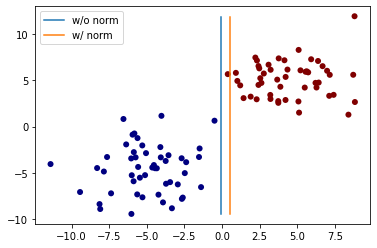

In [241]:
# original 
plt.scatter(X[:,0],X[:,1], c=y,cmap="jet", lw=0)
# plot boundaries 
plt.plot(new_x, new_y)
plt.plot(new_x_norm, new_y_norm)
plt.legend(['w/o norm', 'w/ norm'])

The plots differ from the previous plots in that they are vertical straight lines as opposed to the diagonal lines from SVM. This is as expected since we saw in previous parts that feature 1 was more influential, and also the data is perfectly separable using just feature 1 (hence the vertical line). When the data is normalized, the data is separable at a  higher values of feature 1 hence the difference in the two boosting boundary lines. 

### Exercise 5

#### Part 1.a

First deriving $P(Y = 1 \mid x ) $ given the logistic regression function: 
$$ log(\frac{P(Y = 1 \mid x, \theta)}{P(Y = 0\mid x, theta)}) = \theta^Tx $$

$$ \frac{P(Y = 1 \mid x, \theta)}{P(Y = 0\mid x, theta)} = e^{\theta^T x} $$

$$ P(Y=1 \mid x, \theta)= e^{\theta^Tx} (1 - P(Y=1 \mid x, \theta)) $$

$$ P(Y=1 \mid x, \theta)+  e^{\theta^Tx}  P(Y=1 \mid x, \theta) =  e^{\theta^Tx} $$

$$ P(Y=1 \mid x, \theta) =   \frac{e^{\theta^Tx}}{1+ e^{\theta^Tx} }$$

$$ P(Y=0 \mid x, \theta) =  1- \frac{e^{\theta^Tx}}{1+ e^{\theta^Tx} } = \frac{1}{1 + e^{\theta^Tx}}$$

Finding the negative log-likelihood: 
$$ L(\theta) = \prod_i^n P(y_i \mid x, \theta) $$
Since $y_i \sim Bern(P(y_i = 1 \mid x, \theta) $:
$$ L(\theta) = \prod_i^n P(y_i = 1)^{y_i} (1 - P(y_i = 1))^{1- y_i}) $$

$$ l(\theta) = \sum_i^n [y_i logP(y_i = 1) + (1-y_i) log(1- P(y_i =1))] $$

$$ = \sum_i^n y_i log(\frac{P(y_i = 1)}{1-P(y_i = 1)}) + \sum_i^n log(1-P(y_i = 1)) $$

The log term of the first term is the form of the logistic regression function, which reduces to: 
$$ = \sum_i^n y_i \theta^Tx + \sum_i^n log P(y_i = 0 \mid x, \theta) $$

Using the expression found from above for $P(y_i = 0)$:
$$ = \sum_i^n y_i \theta^Tx + \sum_i^n log \frac{1}{1 + e^{\theta^Tx}} $$
$$ l(\theta)= \sum_i^n y_i \theta^Tx + \sum_i^n - log (1 + e^{\theta^Tx}) $$

$$ -l(\theta)= -\sum_i^n y_i \theta^Tx + \sum_i^n log (1 + e^{\theta^Tx})$$

#### Part 1.b

$$ J(\theta) = -\sum_i^n y_i x + \sum_i^n \frac{xe^{\theta^Tx}}{1 + e^{\theta^Tx}} $$

$$ J(\theta) = \sum_i^n x ( -y_i + \frac{xe^{\theta^Tx}}{1 + e^{\theta^Tx}} ) $$

#### Part 1.c

The gradient descent update for $\theta_j$ is:
$$ \theta_{j+1} = \theta_j - \eta \cdot \sum_i^n x ( -y_i + \frac{xe^{\theta^Tx}}{1 + e^{\theta^Tx}} )  $$

#### Part 2

In [307]:
d = {}
with open("dict.txt") as f:
    for line in f:
       (val, key) = line.split()
       d[int(key)] = val

In [308]:
mv = []
with open("moviereview.tsv", encoding='utf-8') as file:
    mv_file = csv.reader(file, delimiter="\t")
    for row in mv_file:
        mv.append(row)

In [309]:
# make some dict 
training_dict = {}
y = []
ind = 0 
# each key is the movie review, each key is word, each value is 1 
for row in mv: 
    words = row[1]
    y.append(row[0])
    
    # find matching words 
    unq_words = set(words.split(' '))
    ind_match = [k for k, v in d.items() if v in unq_words]
    
    bias_i = {0:1}
    feature_vec_i = dict((key + 1,1) for key in ind_match)
    
    # training_dict[ind] = feature_vec_i
    bias_i.update(feature_vec_i)
    training_dict[ind] = bias_i
    
    ind += 1

    # add 1 to the first of each 

#### Part 3

In [310]:
# split data into 80 20 
X = [v for k, v in training_dict.items()]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=512)

In [333]:
def update_gd(y, x, thetas, eta):
    updates = [] 
    total = sum(range(1, len(thetas) + 1))
    for i in range(len(thetas)):
        # get indices in training data that match with theta_j 
        ind_match = ind_matches[i]
        
        update_j = 0
        for row in ind_match: 
            x_i = x[row]
            y_i = int(y[row])
            
            # get only thetas that x_i has 
            thetas_i = [thetas[x] for x in x_i.keys()]
            
            # calculate gradient update for x_i
            dot = sum([a*b for a,b in zip(thetas_i,x_i.keys())]) 
            y_hat = (1 / (1+math.exp(-dot)))
            update_i = (i / total) * (y_hat - y_i)            
            update_j += update_i
            
        updates.append(eta * update_j)
    
    return updates

In [334]:
# initialize a list of J 0s 
thetas = [0] * (len(d) + 1)
eta = 0.1

# get indices of matches in data for each theta value 
ind_matches = [] 
for i in range(len(thetas)):            
    ind_match_i = [j for j in range(len(X_train)) if i in X_train[j]]
    ind_matches.append(ind_match_i)

# gradient descent for 30 epochs 
t = 0 
while t < 30:
    # get update values 
    update_vals = update_gd(y_train, X_train, thetas, eta)
    # update thetas
    thetas = [t_i - u_i for t_i, u_i in zip(thetas, update_vals)]
    t+= 1

In [335]:
# training error 

# calc predict labels 
tr_preds = []
total = sum(range(1, len(thetas) + 1))

for row in X_train: 
    thetas_i = [thetas[x] for x in row.keys()]
    dot = sum([a*b for a,b in zip(thetas_i,row.keys())]) / total
    prob = 1/ (1 + math.exp(-(dot)))
    
    if prob >= 0.5: 
        tr_preds.append(1)
    else:
        tr_preds.append(0)
    
t = [1 if tr_preds[i] == int(y_train[i]) else 0 for i in range(len(tr_preds))]
print('The training accuracy is: ' + str(round(sum(t) / len(tr_preds),2)))

The training accuracy is: 1.0


In [350]:
# test error 
# calc predict labels 
te_preds = []
total = sum(range(1, len(thetas) + 1))

for row in X_test: 
    thetas_i = [thetas[x] for x in row.keys()]
    dot = sum([a*b for a,b in zip(thetas_i,row.keys())]) / total
    prob = 1/ (1 + math.exp(-(dot)))
    
    if prob >= 0.5: 
        te_preds.append(1)
    else:
        te_preds.append(0)
    
t = [1 if te_preds[i] == int(y_test[i]) else 0 for i in range(len(te_preds))]
sum(t) / len(te_preds)

print('The test accuracy is: ' + str(round(sum(t) / len(te_preds),3)))

The test accuracy is: 0.804


### Exercise 6

#### Part 1

In [256]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df.dropna(axis=1, inplace=True)
titanic_df['Sex'] = np.where(titanic_df['Sex']=='male', 0, 1)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic_df.drop(columns='Survived'), 
    titanic_df['Survived'], 
    test_size=0.2, 
    random_state=500)

#### Part 2

In [258]:
import timeit
gb_timer = timeit.Timer(lambda: GradientBoostingClassifier().fit(
    X_train, y_train)) 
gb_timer.timeit(1)

0.08882368899867288

In [259]:
rf_timer = timeit.Timer(lambda: RandomForestClassifier().fit(
    X_train, y_train)) 
rf_timer.timeit(1)

0.14871093900001142

The gradient boosting model took less time to train. This is mostl likely because by default, boosting algorithm has max depth of 3 for its trees while random forest has no max depth restriction. Therefore, each random forest tree will be fit until it perfectly classifies (while boosting only up to depth of 3). As a result, random forest model takes almost double the time of training boosting. 

#### Part 3

In [260]:
# get range of parameters 
gb_params = {'learning_rate':[0.1,2], 
             'max_depth':[1,10], 
             'max_features':[1,3]}
gb = GradientBoostingClassifier()
gbcv = GridSearchCV(gb, gb_params, cv=5)

rf_params = {'criterion':('gini', 'entropy'), 
             'max_depth':[1,10], 
             'max_features':[1,3]}
rf = RandomForestClassifier()
rfcv = GridSearchCV(rf, rf_params, cv=5)

In [261]:
# tune
gbcv.fit(X_train, y_train)
rfcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [1, 10],
                         'max_features': [1, 3]})

In [262]:
# get best params
best_gb = GradientBoostingClassifier(**gbcv.best_params_)
best_rf = RandomForestClassifier(**rfcv.best_params_)

# fit best
best_gb.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=1)

In [270]:
best_gb

GradientBoostingClassifier(max_depth=1, max_features=3)

In [263]:
# predict on train 
y_scores_gb = best_gb.predict_proba(X_train)
y_scores_rf = best_rf.predict_proba(X_train)

# draw roc, auc 
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, y_scores_gb[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf[:, 1])

Text(0.5, 1.0, 'ROC curves on training set')

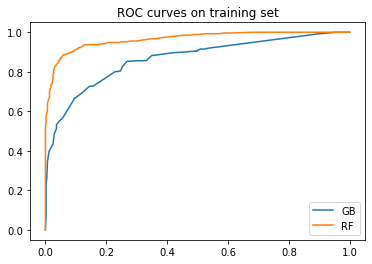

In [264]:
plt.plot(fpr_gb, tpr_gb, label='GB')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.legend()
plt.title('ROC curves on training set')

In [268]:
print('AUC for gradient boosting on the training set is: ' + str(round(auc(fpr_gb, tpr_gb),2)))
print('AUC for random forest on the training set is: ' + str(round(auc(fpr_rf, tpr_rf),2)))

AUC for gradient boosting on the training set is: 0.86
AUC for random forest on the training set is: 0.96


Text(0.5, 1.0, 'ROC curves on test set')

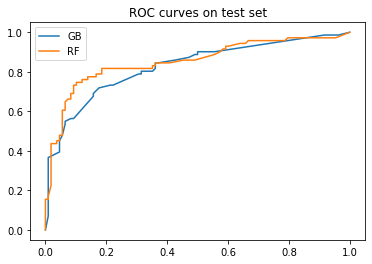

In [266]:
# predict on test
y_scores_gbt = best_gb.predict_proba(X_test)
y_scores_rft = best_rf.predict_proba(X_test)

# draw roc, auc 
fpr_gbt, tpr_gbt, thresholds_gbt = roc_curve(y_test, y_scores_gbt[:,1])
fpr_rft, tpr_rft, thresholds_rft = roc_curve(y_test, y_scores_rft[:, 1])

# draw roc, auc 
plt.plot(fpr_gbt, tpr_gbt, label='GB')
plt.plot(fpr_rft, tpr_rft, label='RF')
plt.legend()
plt.title('ROC curves on test set')

In [269]:
print('AUC for gradient boosting on the test set is: ' + str(round(auc(fpr_gbt, tpr_gbt),2)))
print('AUC for random forest on the test set is: ' + str(round(auc(fpr_rft, tpr_rft),2)))

AUC for gradient boosting on the test set is: 0.83
AUC for random forest on the test set is: 0.85


My results show that random forest perform better on both the training and test set. The best performing random forest from cross validation has parameters max depth of 10 and max features of 1. For boosting, the best parameters were for a max depth of 1 and max features of 3. From the ROC curve for the test set, it appears that random forest outperforms boosting for data points that are confidently classified as 1 (based on the sharp increase in true positive rate at the beginning relative to gradient boosting). Beyond these points, the ROC curve shows that random forest performs similarly to boosting in predicting the remaining data points. 

### Exercise 7

In [172]:
def make_indicators(df, vec, name):
    unq = vec.sort_values().unique()
    dum_df = pd.DataFrame(np.zeros(shape=(len(df), len(unq))))
    
    for i in range(len(unq)):
        # make indicator 
        # change column name 
        if i == len(unq)-1:
            dum_df.iloc[:,i] = 1
            col_name = name + '_leq_' + str(np.round(unq[i],2))
        else:
            idx = vec.index[vec == unq[i]]
            dum_df.iloc[idx, i] = 1
            mid = (unq[i] + unq[i+1])/2
            col_name = name + '_leq_' + str(np.round(mid,2))
        
        
        dum_df.rename(columns={dum_df.columns[i]: col_name}, inplace=True)
            
        
    return dum_df

In [173]:
# read in data
peng_df = pd.read_csv('penguins_trunc.csv')

# get dummy data
cl_df = make_indicators(peng_df, peng_df.CulmenLength, 'CulmenLength')
cd_df = make_indicators(peng_df, peng_df.CulmenDepth, 'CulmenDepth')
fl_df = make_indicators(peng_df, peng_df.FlipperLength, 'FlipperLength')

peng_dum_df = pd.concat([peng_df.Species, cl_df, cd_df, fl_df], axis = 1)

In [175]:
# split 80/20 train/test data
X_trainp, X_testp, y_trainp, y_testp = train_test_split(
    peng_dum_df.drop(columns='Species'), 
    peng_dum_df['Species'], 
    test_size=0.2, 
    random_state=512)

In [176]:
# fit lr model 
lr = LogisticRegression(penalty='l1', solver='liblinear').fit(
    X_trainp, y_trainp)
coefs = lr.coef_[0]
inter = lr.intercept_

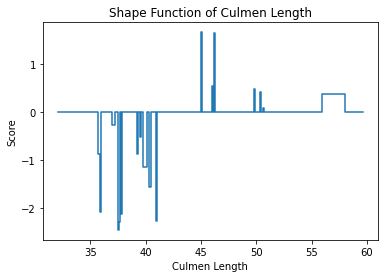

In [177]:
# shape function for CulmenLength
cl_vals = peng_dum_df.iloc[:, 1:len(peng_df.CulmenLength.unique()) + 1].sum(
    axis=0)
cl_coefs = coefs[1:len(peng_df.CulmenLength.unique()) + 1]
shape_cl = np.multiply(cl_vals,cl_coefs) 

plt.step(peng_df.CulmenLength.sort_values().unique(), shape_cl)
plt.title('Shape Function of Culmen Length')
plt.xlabel('Culmen Length') 
plt.ylabel('Score') 
plt.show()

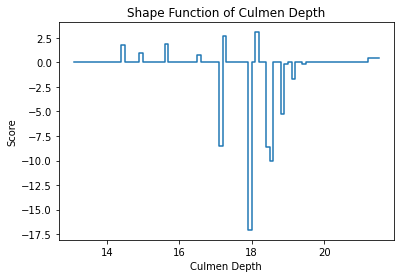

In [178]:
cd_vals = peng_dum_df.iloc[:, 164:len(peng_df.CulmenDepth.unique()) + 164].sum(
    axis=0)
cd_coefs = coefs[164:len(peng_df.CulmenDepth.unique()) + 164]
shape_cd = np.multiply(cd_vals,cd_coefs) 

plt.step(peng_df.CulmenDepth.sort_values().unique(), shape_cd)
plt.title('Shape Function of Culmen Depth')
plt.xlabel('Culmen Depth') 
plt.ylabel('Score') 
plt.show()

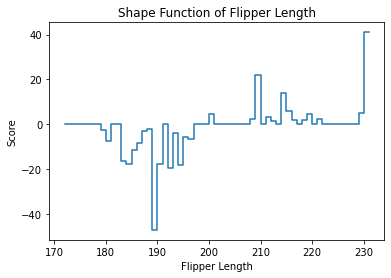

In [179]:
fl_vals = peng_dum_df.iloc[:, (len(peng_df.CulmenLength.unique()) + 
                               len(peng_df.CulmenDepth.unique())+1):].sum(
    axis=0)
fl_coefs = coefs[(len(peng_df.CulmenLength.unique()) + 
                  len(peng_df.CulmenDepth.unique())):]
shape_fl = np.multiply(fl_vals,fl_coefs)

plt.step(peng_df.FlipperLength.sort_values().unique(), shape_fl)
plt.title('Shape Function of Flipper Length')
plt.xlabel('Flipper Length') 
plt.ylabel('Score') 
plt.show()

In [180]:
# training accuracy 
lr.score(X_trainp, y_trainp)

0.8791208791208791

In [181]:
# testing accuracy 
lr.score(X_testp, y_testp)

0.7246376811594203